In [1]:
import pandas as pd

data_path = 'C:/Users/pathu/Downloads/order.csv'
data = pd.read_csv(data_path)


data['created_at'] = pd.to_datetime(data['created_at'])


data.head()


,id,display_order_id,total_amount,created_at,customer_id
0,13392,YTFA,425,2024-10-14 15:12:43,1251.0
1,13393,N1U7,1650,2024-10-14 15:17:25,1251.0
2,13394,PADV,1365,2024-10-14 17:02:16,468.0
3,13395,OKVW,525,2024-10-14 17:03:36,1251.0
4,13396,2G3Q,525,2024-10-14 17:04:49,468.0


In [11]:
print(data.isnull().sum())

id                    0
display_order_id     36
total_amount          0
created_at            0
customer_id         125
dtype: int64


In [12]:
data = data.dropna()

In [13]:
customer_data = data.groupby('customer_id').agg(
    total_orders=('id', 'count'),
    total_revenue=('total_amount', 'sum')
).reset_index()

customer_data['repeat_purchase'] = customer_data['total_orders'].apply(lambda x: 1 if x > 1 else 0)

customer_data.head()


,customer_id,total_orders,total_revenue,repeat_purchase
0,8.0,11,27500,1
1,9.0,2,6797,1
2,10.0,12,31200,1
3,12.0,7,17200,1
4,14.0,112,384436,1


In [19]:
repeat_counts = customer_data['repeat_purchase'].value_counts()


print("Counts of repeat purchases (1s) and non-repeat purchases (0s):")
print(repeat_counts)


total_counts = repeat_counts.sum()
balance = repeat_counts.min() / total_counts * 100  

print(f"\nPercentage of non-repeat purchases (0s): {repeat_counts.get(0, 0) / total_counts * 100:.2f}%")
print(f"Percentage of repeat purchases (1s): {repeat_counts.get(1, 0) / total_counts * 100:.2f}%")
print(f"Balance ratio (minority/majority): {balance:.2f}%")


Counts of repeat purchases (1s) and non-repeat purchases (0s):
0    526
1    129
Name: repeat_purchase, dtype: int64

Percentage of non-repeat purchases (0s): 80.31%
Percentage of repeat purchases (1s): 19.69%
Balance ratio (minority/majority): 19.69%


In [21]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
X = customer_data[['total_orders', 'total_revenue']]
y = customer_data['repeat_purchase']

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Distribution after SMOTE:")
print(y_resampled.value_counts())

Distribution after SMOTE:
1    526
0    526
Name: repeat_purchase, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)


In [25]:
from sklearn.ensemble import RandomForestClassifier


if len(X_train) > 100: 
   
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    print("Model trained successfully.")
else:
    print("Insufficient data for model training.")



Model trained successfully.


In [29]:

if len(X_train) > 100:
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    print("Model trained successfully.")
    
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)
else:
    print("Insufficient data for model training.")


Model trained successfully.
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00       158

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316



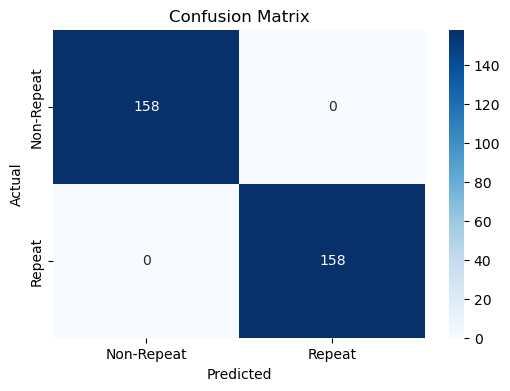

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Repeat', 'Repeat'], 
            yticklabels=['Non-Repeat', 'Repeat'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
